# Philadelphia Unemployment Data 
## Deja McCauley
## UP221 GIS Midterm
### This assignment is exploring employment and unemployment rates in Philadelphia.
#### Research Question: What community needs emerge as a priority for North Philadelphia’s Logan neighborhood when using indicators (race, unemployment, food accessibility, open space access, and housing) to compare the area to the city as a whole?
##### Data Sources: Social Explorer ACS and Open Data Philly 

In [1]:
# to download osm data
import osmnx as ox

# to manipulate data
import pandas as pd

# for interactive plots
import plotly.express as px

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt



In [3]:
df=pd.read_csv(
    'data/Philly_Unemployment.csv',
    dtype= 
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [4]:
df.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,...,Geo_GEOID,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_PLACESE,SE_A17005_001,SE_A17005_002,SE_A17005_003,PCT_SE_A17005_002,PCT_SE_A17005_003
0,42101000101,"Census Tract 1.01, Philadelphia County, Pennsy...",ACSSF,pa,140,0,8807,NaN,NaN,NaN,...,14000US42101000101,Census Tract 1.01,NaN,NaN,NaN,1675,1590,85,94.93,5.07
1,42101000102,"Census Tract 1.02, Philadelphia County, Pennsy...",ACSSF,pa,140,0,8808,NaN,NaN,NaN,...,14000US42101000102,Census Tract 1.02,NaN,NaN,NaN,2246,2152,94,95.81,4.19
2,42101000200,"Census Tract 2, Philadelphia County, Pennsylvania",ACSSF,pa,140,0,8809,NaN,NaN,NaN,...,14000US42101000200,Census Tract 2,NaN,NaN,NaN,2361,2236,125,94.71,5.29
3,42101000300,"Census Tract 3, Philadelphia County, Pennsylvania",ACSSF,pa,140,0,8810,NaN,NaN,NaN,...,14000US42101000300,Census Tract 3,NaN,NaN,NaN,2097,2004,93,95.57,4.43
4,42101000401,"Census Tract 4.01, Philadelphia County, Pennsy...",ACSSF,pa,140,0,8811,NaN,NaN,NaN,...,14000US42101000401,Census Tract 4.01,NaN,NaN,NaN,1630,1622,8,99.51,0.49


In [5]:
df.info(verbose = True,show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           408 non-null    object 
 1   Geo_QName          408 non-null    object 
 2   Geo_FILEID         408 non-null    object 
 3   Geo_STUSAB         408 non-null    object 
 4   Geo_SUMLEV         408 non-null    int64  
 5   Geo_GEOCOMP        408 non-null    int64  
 6   Geo_LOGRECNO       408 non-null    int64  
 7   Geo_US             0 non-null      float64
 8   Geo_REGION         0 non-null      float64
 9   Geo_DIVISION       0 non-null      float64
 10  Geo_STATECE        0 non-null      float64
 11  Geo_STATE          408 non-null    object 
 12  Geo_COUNTY         408 non-null    object 
 13  Geo_COUSUB         0 non-null      float64
 14  Geo_PLACE          0 non-null      float64
 15  Geo_TRACT          408 non-null    int64  
 16  Geo_BLKGRP         0 non-n

In [6]:
#dropping and deleting null columns, list of fields below have no data in them 
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA5',
 'Geo_PUMA1',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

In [7]:
#dropping columns with no data 
df=df.dropna(axis=1,how="all")

In [8]:
#check data with dropped null columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           408 non-null    object 
 1   Geo_QName          408 non-null    object 
 2   Geo_FILEID         408 non-null    object 
 3   Geo_STUSAB         408 non-null    object 
 4   Geo_SUMLEV         408 non-null    int64  
 5   Geo_GEOCOMP        408 non-null    int64  
 6   Geo_LOGRECNO       408 non-null    int64  
 7   Geo_STATE          408 non-null    object 
 8   Geo_COUNTY         408 non-null    object 
 9   Geo_TRACT          408 non-null    int64  
 10  Geo_GEOID          408 non-null    object 
 11  Geo_NAME           408 non-null    object 
 12  SE_A17005_001      408 non-null    int64  
 13  SE_A17005_002      408 non-null    int64  
 14  SE_A17005_003      408 non-null    int64  
 15  PCT_SE_A17005_002  389 non-null    float64
 16  PCT_SE_A17005_003  389 non

In [9]:
#reinspect the data
df.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_GEOID,Geo_NAME,SE_A17005_001,SE_A17005_002,SE_A17005_003,PCT_SE_A17005_002,PCT_SE_A17005_003
0,42101000101,"Census Tract 1.01, Philadelphia County, Pennsy...",ACSSF,pa,140,0,8807,42,101,101,14000US42101000101,Census Tract 1.01,1675,1590,85,94.93,5.07
1,42101000102,"Census Tract 1.02, Philadelphia County, Pennsy...",ACSSF,pa,140,0,8808,42,101,102,14000US42101000102,Census Tract 1.02,2246,2152,94,95.81,4.19
2,42101000200,"Census Tract 2, Philadelphia County, Pennsylvania",ACSSF,pa,140,0,8809,42,101,200,14000US42101000200,Census Tract 2,2361,2236,125,94.71,5.29
3,42101000300,"Census Tract 3, Philadelphia County, Pennsylvania",ACSSF,pa,140,0,8810,42,101,300,14000US42101000300,Census Tract 3,2097,2004,93,95.57,4.43
4,42101000401,"Census Tract 4.01, Philadelphia County, Pennsy...",ACSSF,pa,140,0,8811,42,101,401,14000US42101000401,Census Tract 4.01,1630,1622,8,99.51,0.49


In [10]:
#define columns to keep
columns_to_keep=['Geo_FIPS',
                 'SE_A17005_001',
                 'SE_A17005_002',
                 'SE_A17005_003',
                 'PCT_SE_A17005_002',
                 'PCT_SE_A17005_003',]
#add it to a new dataframe
df2=df[columns_to_keep]

In [11]:
#look at columns in new dataframe, same as df.columns.to_list
columns=list(df2)
columns

['Geo_FIPS',
 'SE_A17005_001',
 'SE_A17005_002',
 'SE_A17005_003',
 'PCT_SE_A17005_002',
 'PCT_SE_A17005_003']

In [12]:
df2.columns=['FIPS',
             'Total Labor',
             'Employed',
             'Unemployed',
             'Pct Employed',
             'Pct Unemployed']

In [13]:
df2.sample(5)

,FIPS,Total Labor,Employed,Unemployed,Pct Employed,Pct Unemployed
90,42101008602,1922,1701,221,88.50,11.50
204,42101020300,1374,1168,206,85.01,14.99
24,42101001301,1403,1233,170,87.88,12.12
406,42101989200,0,0,0,NaN,NaN
220,42101021800,3327,3002,325,90.23,9.77


In [14]:
# accessing a single column, number employed 
df2['Employed'].head()

0    1590
1    2152
2    2236
3    2004
4    1622
Name: Employed, dtype: int64

In [15]:
#what is the average number of employed in philly per census tract
df2['Employed'].mean()

1791.0049019607843

In [16]:
df2['Pct Employed'].mean() #91% employed average in Philly per census tract

90.87979434447303

In [17]:
df2['Pct Unemployed'].mean() #9% unemployed average in Philly per census tract 

9.120205655526991

In [18]:
df2['Total Labor'].median()

1926.0

In [19]:
df2['Total Labor'].describe()

count     408.000000
mean     1966.409314
std       935.898237
min         0.000000
25%      1364.250000
50%      1926.000000
75%      2601.750000
max      5084.000000
Name: Total Labor, dtype: float64

<AxesSubplot: ylabel='Frequency'>

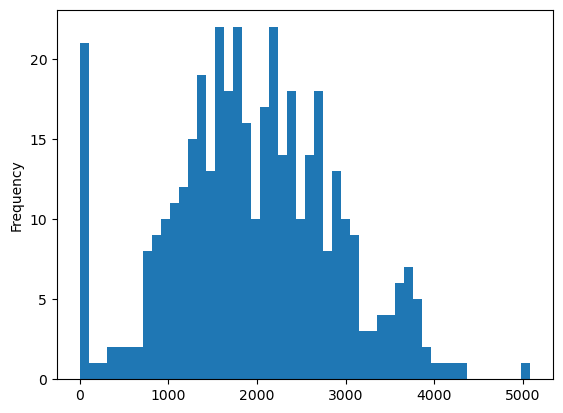

In [20]:
#shows total labor force per census tract. labor force ranges anywhere from 0 to 5000 people per census tract
df2['Total Labor'].plot.hist(bins=50) 

<AxesSubplot: ylabel='Frequency'>

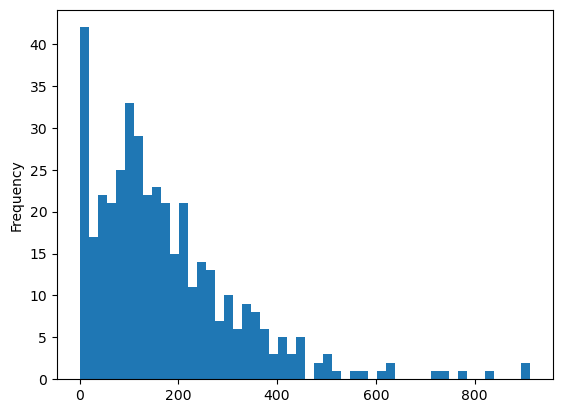

In [21]:
#unemployed labor force ranges from 0 people to 1000 people per census tract
df2['Unemployed'].plot.hist(bins=50)

<AxesSubplot: >

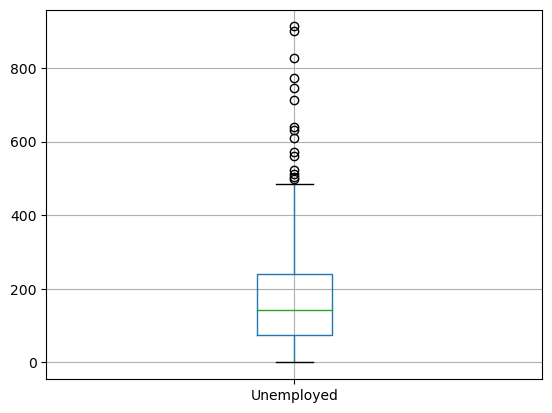

In [22]:
df2.boxplot(column=['Unemployed'])

<AxesSubplot: xlabel='Employed', ylabel='Unemployed'>

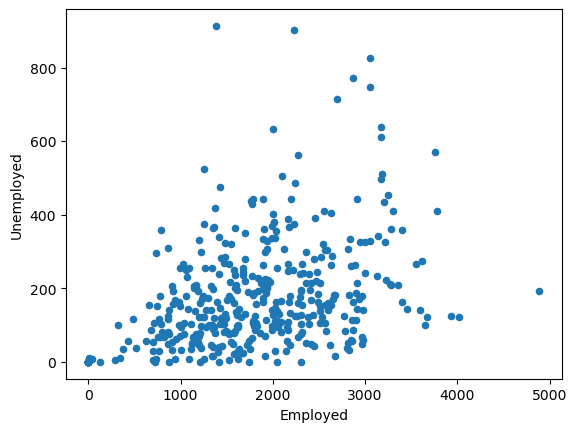

In [23]:
df2.plot.scatter(x='Employed',y='Unemployed')

In [24]:
#sorting top or highest employed census tracts 
df_sorted= df2.sort_values(by= 'Employed',ascending= False)

In [25]:
#display a few columns of the data 
df_sorted[['FIPS','Employed']].head(10)

,FIPS,Employed
159,42101015800,4890
331,42101034400,4016
162,42101016100,3936
314,42101032600,3775
52,42101003901,3763
147,42101014400,3674
212,42101021000,3645
304,42101031501,3612
297,42101031000,3598
293,42101030600,3548


<AxesSubplot: xlabel='FIPS'>

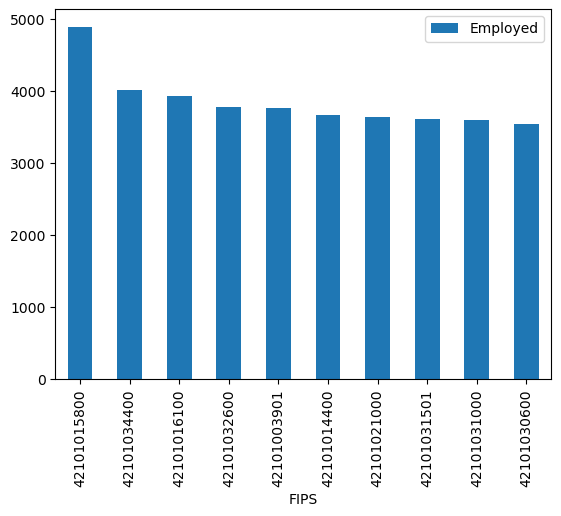

In [26]:
df_sorted.head(10).plot.bar(x='FIPS',y= 'Employed')

In [27]:
#same for unemployed 
df_sorted= df2.sort_values(by= 'Unemployed',ascending= False)

In [28]:
df_sorted[['FIPS','Unemployed']].head(10)

,FIPS,Unemployed
272,42101028200,913
155,42101015200,901
316,42101033000,826
239,42101025200,772
71,42101006700,747
300,42101031200,714
47,42101003300,639
197,42101019700,632
276,42101028600,610
52,42101003901,571


<AxesSubplot: xlabel='FIPS'>

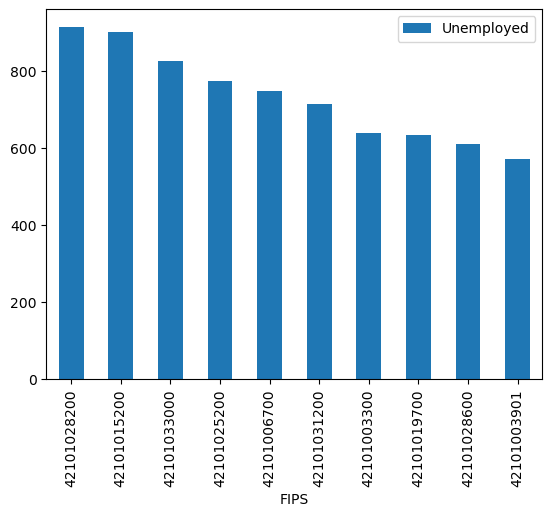

In [29]:
df_sorted.head(10).plot.bar(x='FIPS',y= 'Unemployed')

<AxesSubplot: title={'center': 'Top 10 Unemployed Census Tracts in Philadelphia County in 2021'}, xlabel='FIPS'>

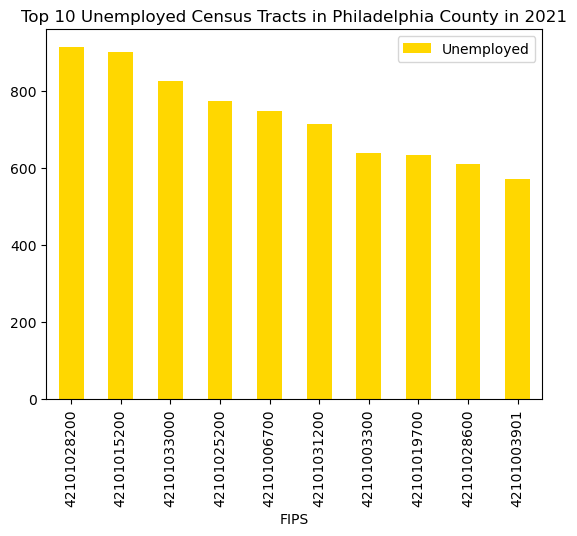

In [30]:
df_sorted.head(10).plot.bar(x='FIPS',
                             y= 'Unemployed',
                             title= 'Top 10 Unemployed Census Tracts in Philadelphia County in 2021',
                             color= 'gold')

<AxesSubplot: title={'center': 'Top 10 Unemployed Census Tracts in Philadelphia County in 2021'}, ylabel='FIPS'>

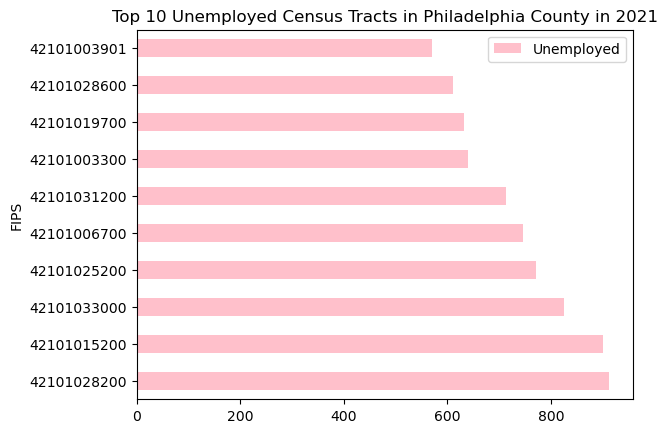

In [31]:
#barh means its horizontal now 
df_sorted.head(10).plot.barh(x='FIPS',
                             y= 'Unemployed',
                             title= 'Top 10 Unemployed Census Tracts in Philadelphia County in 2021',
                             color= 'pink')

In [32]:
import geopandas as gpd

In [34]:
#read in a gejson file downloaded from the philly open data portal census tract data 
tracts=gpd.read_file('data/Philly Census_Tracts_2010.geojson')
tracts.head()

,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,LOGRECNO,geometry
0,1,42,101,009400,42101009400,94,Census Tract 94,G5020,S,366717,0,+39.9632709,-075.2322437,10429,"POLYGON ((-75.22927 39.96054, -75.22865 39.960..."
1,2,42,101,009500,42101009500,95,Census Tract 95,G5020,S,319070,0,+39.9658709,-075.2379140,10430,"POLYGON ((-75.23536 39.96852, -75.23545 39.969..."
2,3,42,101,009600,42101009600,96,Census Tract 96,G5020,S,405273,0,+39.9655396,-075.2435075,10431,"POLYGON ((-75.24343 39.96230, -75.24339 39.962..."
3,4,42,101,013800,42101013800,138,Census Tract 138,G5020,S,341256,0,+39.9764504,-075.1771771,10468,"POLYGON ((-75.17341 39.97779, -75.17386 39.977..."
4,5,42,101,013900,42101013900,139,Census Tract 139,G5020,S,562934,0,+39.9750563,-075.1711846,10469,"POLYGON ((-75.17313 39.97776, -75.17321 39.977..."


<AxesSubplot: >

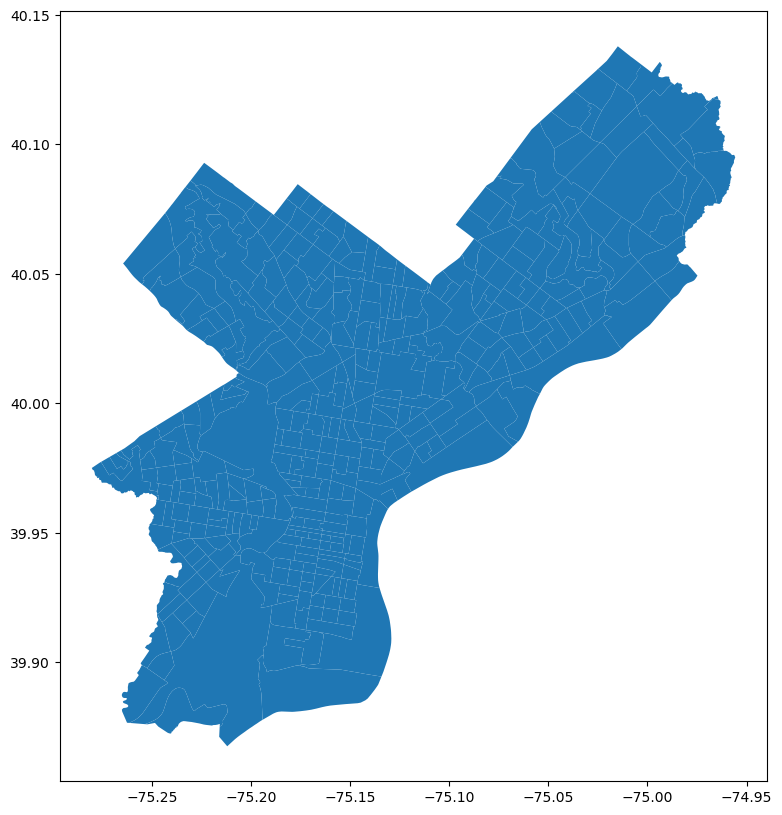

In [35]:
tracts.plot(figsize=(12,10)) #plot the census tracts 

In [36]:
#more about the data 
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    384 non-null    int64   
 1   STATEFP10   384 non-null    object  
 2   COUNTYFP10  384 non-null    object  
 3   TRACTCE10   384 non-null    object  
 4   GEOID10     384 non-null    object  
 5   NAME10      384 non-null    object  
 6   NAMELSAD10  384 non-null    object  
 7   MTFCC10     384 non-null    object  
 8   FUNCSTAT10  384 non-null    object  
 9   ALAND10     384 non-null    int64   
 10  AWATER10    384 non-null    int64   
 11  INTPTLAT10  384 non-null    object  
 12  INTPTLON10  384 non-null    object  
 13  LOGRECNO    384 non-null    object  
 14  geometry    384 non-null    geometry
dtypes: geometry(1), int64(3), object(11)
memory usage: 45.1+ KB


In [37]:
#subset the data for FIPS and geometry 
tracts=tracts[['GEOID10','geometry']]

In [38]:
tracts.head() #check the data 

,GEOID10,geometry
0,42101009400,"POLYGON ((-75.22927 39.96054, -75.22865 39.960..."
1,42101009500,"POLYGON ((-75.23536 39.96852, -75.23545 39.969..."
2,42101009600,"POLYGON ((-75.24343 39.96230, -75.24339 39.962..."
3,42101013800,"POLYGON ((-75.17341 39.97779, -75.17386 39.977..."
4,42101013900,"POLYGON ((-75.17313 39.97776, -75.17321 39.977..."


In [39]:
columns=list(tracts)
columns

['GEOID10', 'geometry']

In [40]:
tracts.columns=['FIPS',
                'geometry']

In [41]:
tracts.sample(5)

,FIPS,geometry
245,42101018300,"POLYGON ((-75.06802 39.98314, -75.06588 39.984..."
268,42101026400,"POLYGON ((-75.16596 40.05983, -75.16577 40.059..."
374,42101035302,"POLYGON ((-74.98757 40.07583, -74.98827 40.076..."
266,42101034801,"POLYGON ((-75.02119 40.06170, -75.02131 40.061..."
125,42101034200,"POLYGON ((-75.06698 40.07628, -75.06618 40.077..."


In [42]:
#create a new datafram based on join to merge employment and tract data to create a map 
tracts_labor=tracts.merge(df2,on="FIPS")

In [43]:
tracts_labor.head()

,FIPS,geometry,Total Labor,Employed,Unemployed,Pct Employed,Pct Unemployed
0,42101009400,"POLYGON ((-75.22927 39.96054, -75.22865 39.960...",1725,1442,283,83.59,16.41
1,42101009500,"POLYGON ((-75.23536 39.96852, -75.23545 39.969...",1373,1214,159,88.42,11.58
2,42101009600,"POLYGON ((-75.24343 39.96230, -75.24339 39.962...",1569,1466,103,93.44,6.56
3,42101013800,"POLYGON ((-75.17341 39.97779, -75.17386 39.977...",1178,1128,50,95.76,4.24
4,42101013900,"POLYGON ((-75.17313 39.97776, -75.17321 39.977...",1413,1312,101,92.85,7.15


<AxesSubplot: >

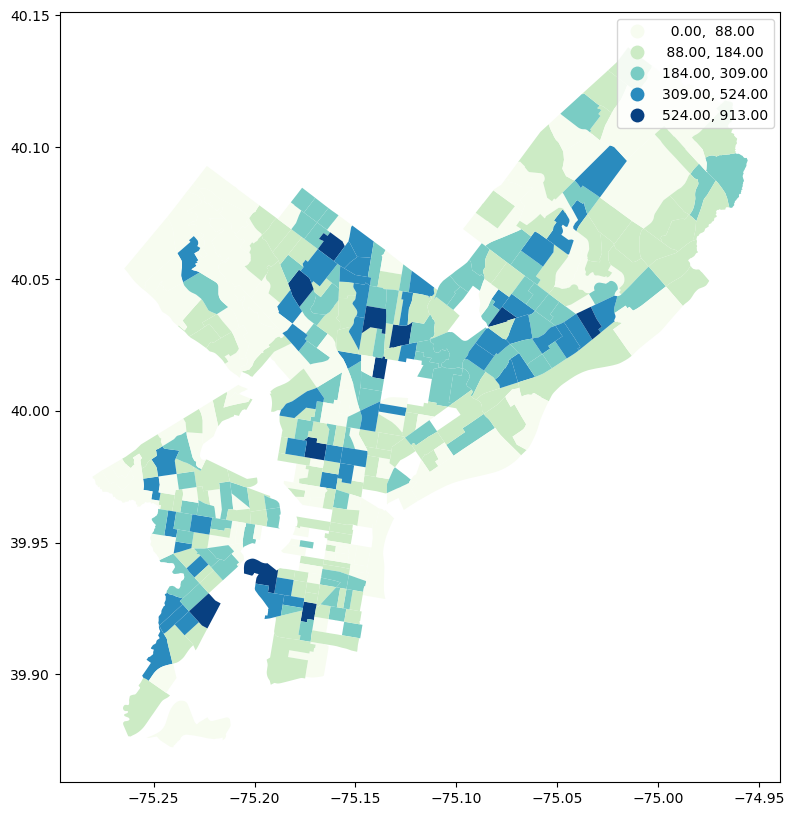

In [44]:
#simple plot creation with newly joined data 
tracts_labor.plot(figsize=(12,10),
                  column='Unemployed',
                  legend=True,
                  cmap= 'GnBu',
                  scheme='NaturalBreaks')

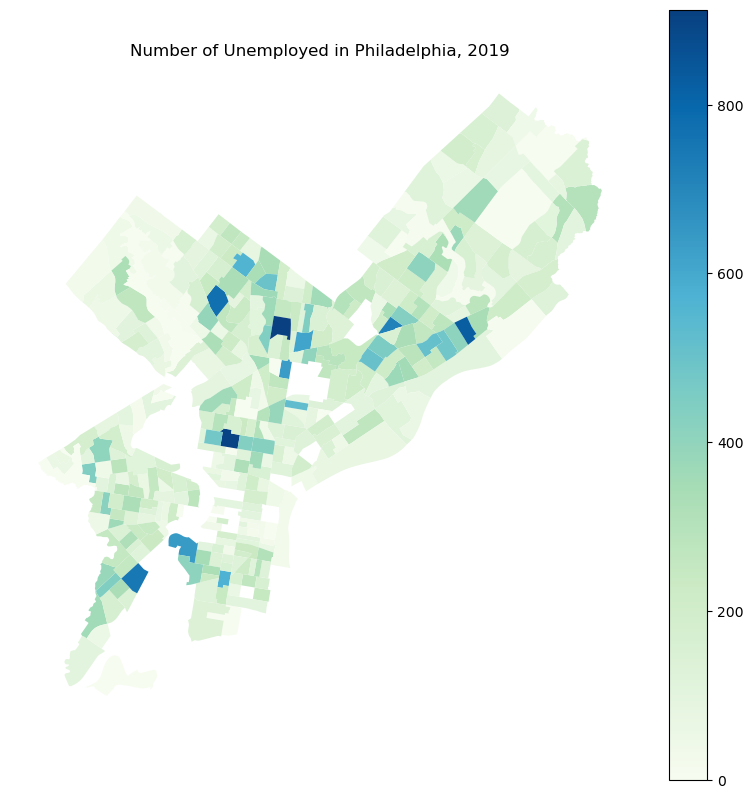

In [45]:
fig, ax = plt.subplots(figsize=(10,10))

# create the map plot
tracts_labor.plot(ax=ax,
         column='Unemployed',
         cmap='GnBu',
         legend=True,)
        

# add a title
ax.set_title('Number of Unemployed in Philadelphia, 2019')

# get rid of the axis
ax.axis('off');

<AxesSubplot: >

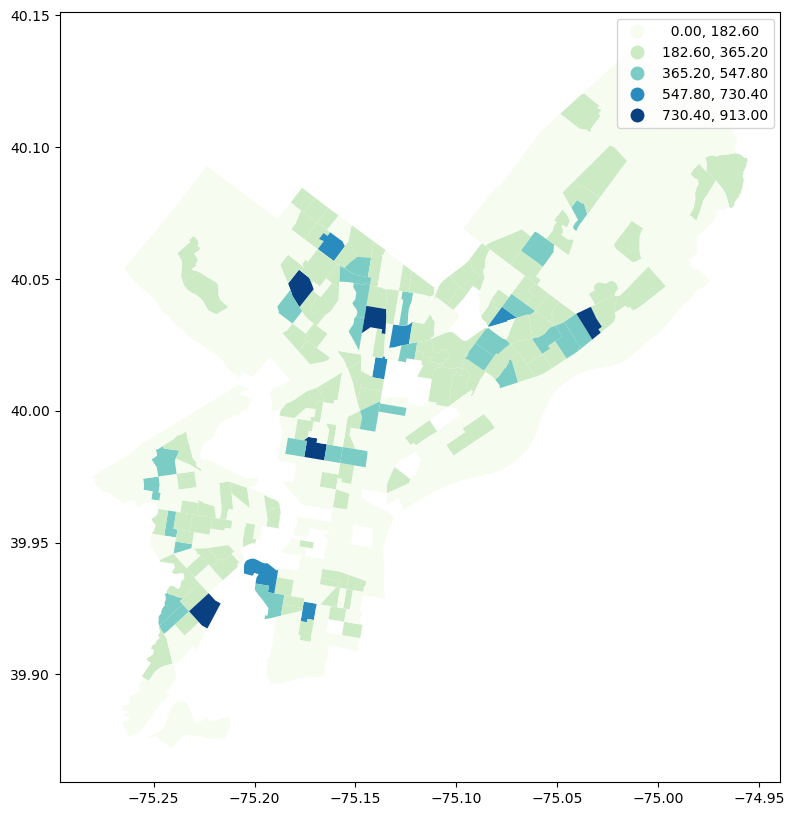

In [46]:
tracts_labor.plot(figsize=(12,10),
                 column='Unemployed',
                 legend=True, 
                  cmap= 'GnBu',
                 scheme='equal_interval')

<AxesSubplot: >

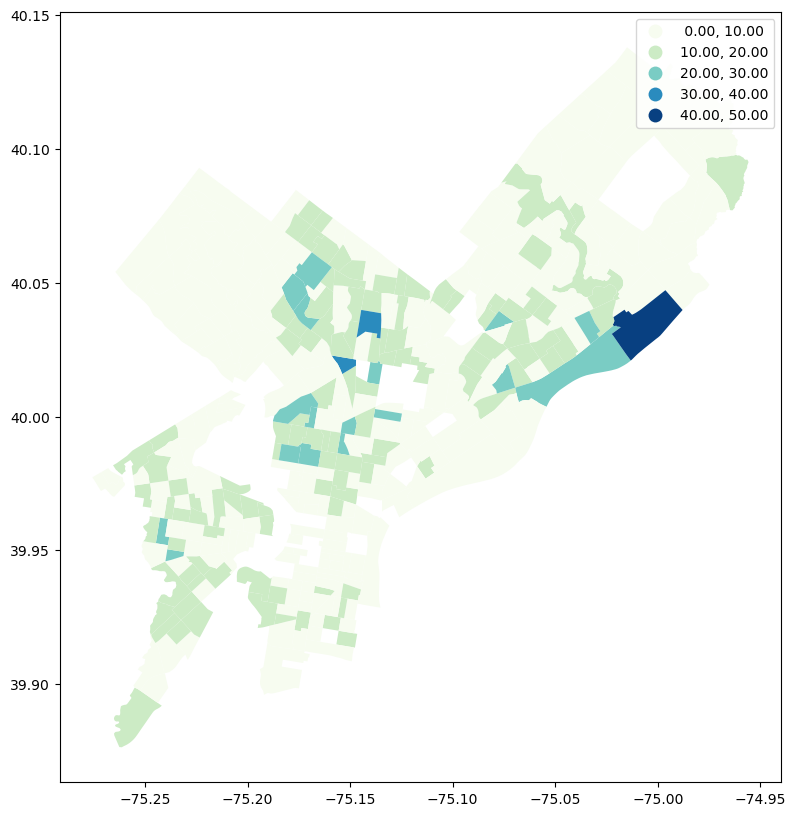

In [47]:
tracts_labor.plot(figsize=(12,10),
                 column='Pct Unemployed',
                 legend=True,
                  cmap= 'GnBu',
                 scheme='equal_interval')

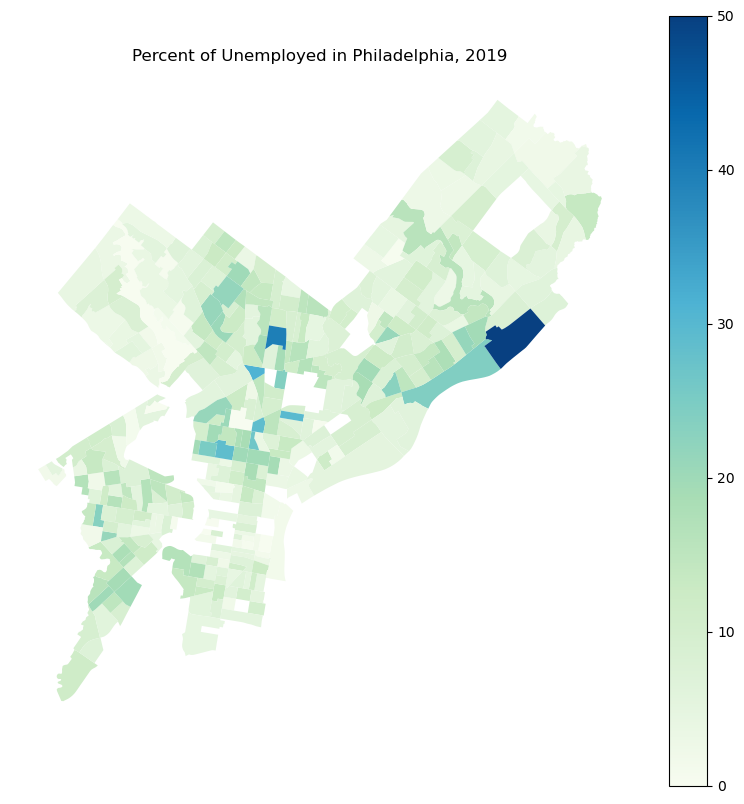

In [48]:
fig, ax = plt.subplots(figsize=(10,10))

# create the map plot
tracts_labor.plot(ax=ax,
         column='Pct Unemployed',
         cmap='GnBu',
         legend=True,)
        

# add a title
ax.set_title('Percent of Unemployed in Philadelphia, 2019')

# get rid of the axis
ax.axis('off');